# CUSTOMER CHURN ANALYSIS

Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers.Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

 In this project I have done a predictive analytics using machine learnig models and choosing the best of them for as the  churn prediction model that predict customer churn by assessing their propensity of risk to churn. Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn.

The dataset for this project has been taken from kaggle 
link:-https://www.kaggle.com/becksddf/churn-in-telecoms-dataset

## IMPORT LIBRARIES

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## DATA SET IMPORTING


The dataset is downloaded and loaded

In [8]:
data=pd.read_csv("C:/Users/HP/Desktop/coursera/project/customer_churn/customer_churn.csv")
data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


### EXPLORATORY DATA ANALYSIS

After importing the dataset a few exploratory analysis procedures are done 

The shape of the dataset

In [9]:
data.shape

(3333, 21)

viewing the top 3 rows of the dataset

In [10]:
data.head(3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame.

In [11]:
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## MISSING DATA

A test for mising data

In [12]:
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

From the output its clear that there is no missing data

### CHURN VALUES


Doing an anyalsis of the churn values

Showing how many customers in the data set are retained or lost

In [13]:
churn=data.groupby('churn').size()

In [14]:
churn

churn
False    2850
True      483
dtype: int64

Calculating the retained and lost percentage 

In [15]:
retained_percentage=(churn[0]/churn.sum())*100
lost_percentage=(churn[1]/churn.sum())*100

In [16]:
retained_percentage

85.5085508550855

In [17]:
lost_percentage

14.491449144914492

## PLOT FEW GRAPHS

### NUMBER OF CHURN TRUE OR FLASE

A graph showing how many are retained and lost

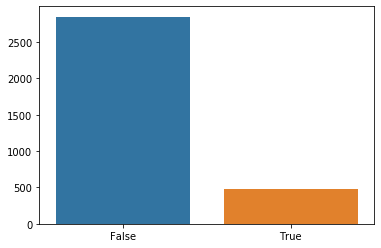

In [18]:
c = data["churn"].value_counts()
#print (y)
sns.barplot(c.index, c.values)

### CHURN BY STATE

Graph showing the churn values with respective to the states

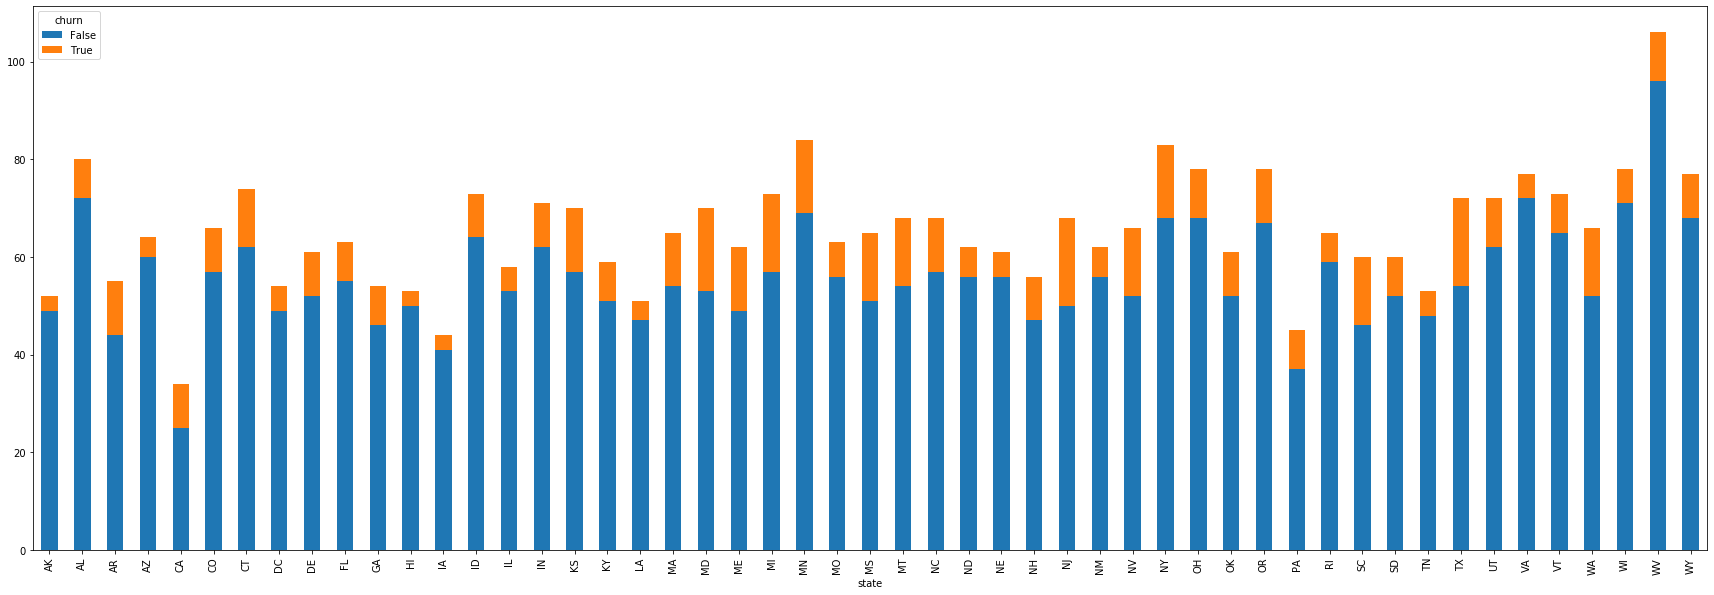

In [19]:
data.groupby(['state','churn']).size().unstack().plot(kind="bar",stacked=True,figsize=(30,10))


### CHURN BY AREA CODE

Graph showing the churn values with respective to the area code

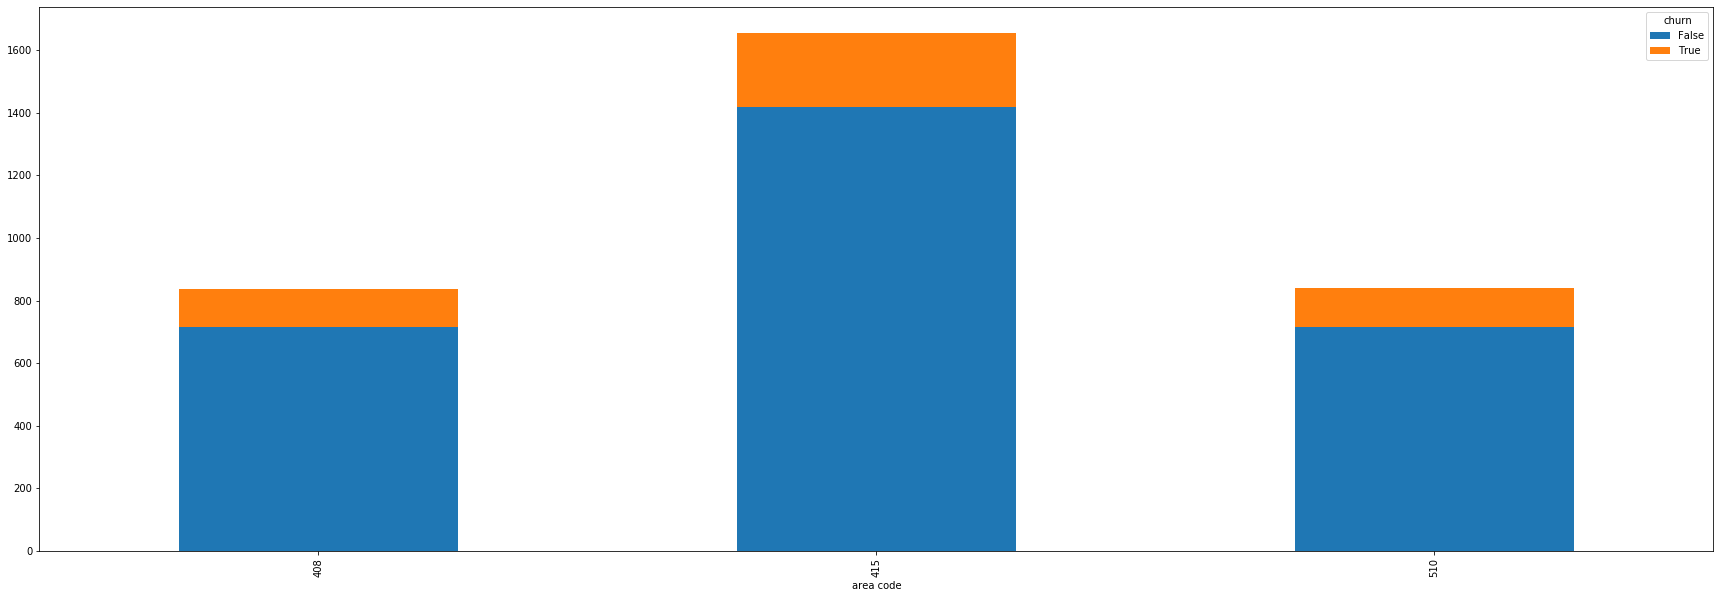

In [20]:
data.groupby(['area code','churn']).size().unstack().plot(kind="bar",stacked=True,figsize=(30,10))

### INTERNATONAL PLANS

Graph showing the churn values with respective to the international plans

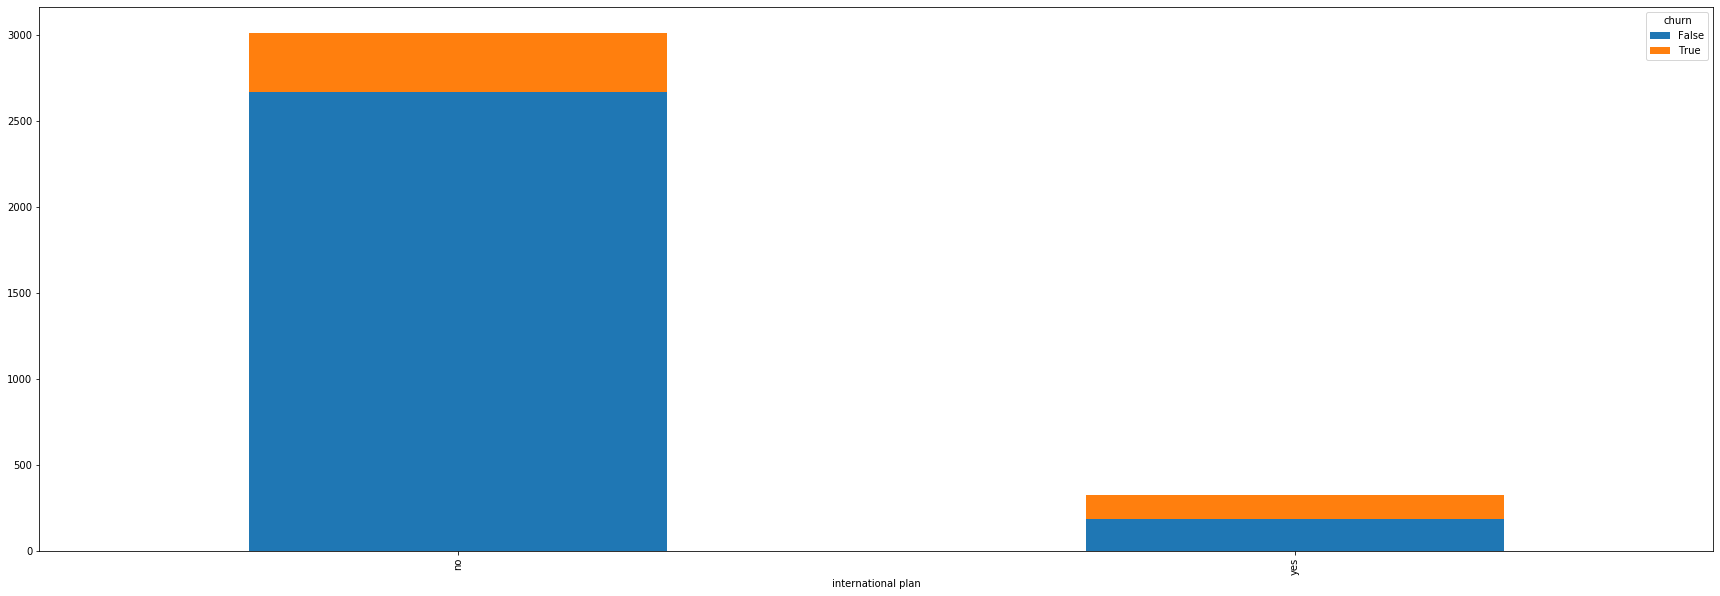

In [21]:
data.groupby(['international plan','churn']).size().unstack().plot(kind="bar",stacked=True,figsize=(30,10))

### CHURN BY VOICEMAILS

Graph showing the churn values with respective to the voice mails

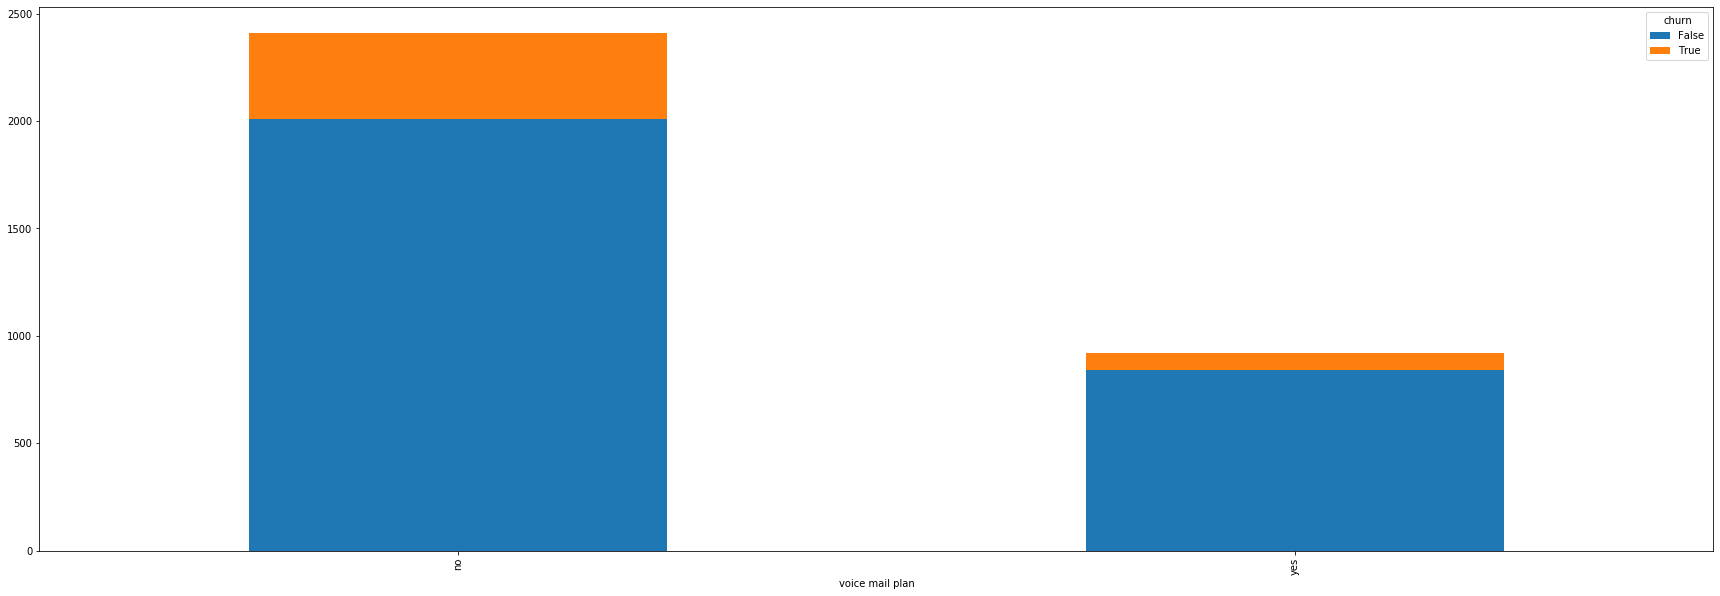

In [22]:
data.groupby(['voice mail plan','churn']).size().unstack().plot(kind="bar",stacked=True,figsize=(30,10))


## CORRELATON MATRIX

The correlation matrix is plotted to study the correlation between the features

In [23]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1,-0.012,-0.0046,0.0062,0.038,0.0062,-0.0068,0.019,-0.0067,-0.009,-0.013,-0.009,0.0095,0.021,0.0095,-0.0038,0.017
area code,-0.012,1,-0.002,-0.0083,-0.0096,-0.0083,0.0036,-0.012,0.0036,-0.0058,0.017,-0.0058,-0.018,-0.024,-0.018,0.028,0.0062
number vmail messages,-0.0046,-0.002,1,0.00078,-0.0095,0.00078,0.018,-0.0059,0.018,0.0077,0.0071,0.0077,0.0029,0.014,0.0029,-0.013,-0.09
total day minutes,0.0062,-0.0083,0.00078,1,0.0068,1,0.007,0.016,0.007,0.0043,0.023,0.0043,-0.01,0.008,-0.01,-0.013,0.21
total day calls,0.038,-0.0096,-0.0095,0.0068,1,0.0068,-0.021,0.0065,-0.021,0.023,-0.02,0.023,0.022,0.0046,0.022,-0.019,0.018
total day charge,0.0062,-0.0083,0.00078,1,0.0068,1,0.007,0.016,0.007,0.0043,0.023,0.0043,-0.01,0.008,-0.01,-0.013,0.21
total eve minutes,-0.0068,0.0036,0.018,0.007,-0.021,0.007,1,-0.011,1,-0.013,0.0076,-0.013,-0.011,0.0025,-0.011,-0.013,0.093
total eve calls,0.019,-0.012,-0.0059,0.016,0.0065,0.016,-0.011,1,-0.011,-0.0021,0.0077,-0.0021,0.0087,0.017,0.0087,0.0024,0.0092
total eve charge,-0.0067,0.0036,0.018,0.007,-0.021,0.007,1,-0.011,1,-0.013,0.0076,-0.013,-0.011,0.0025,-0.011,-0.013,0.093
total night minutes,-0.009,-0.0058,0.0077,0.0043,0.023,0.0043,-0.013,-0.0021,-0.013,1,0.011,1,-0.015,-0.012,-0.015,-0.0093,0.035


### ENCODING CATEGORICAL DATA

A categorical variable is a variable whose values take on the value of labels. ... Machine learning algorithms and deep learning neural networks require that input and output variables are numbers. This means that categorical data must be encoded to numbers before we can use it to fit and evaluate a model.

In [24]:
# Discreet value integer encoder
from sklearn.preprocessing import LabelEncoder
label_encoder =LabelEncoder()
data['state'] = label_encoder.fit_transform(data['state'])
data['international plan'] = label_encoder.fit_transform(data['international plan'])
data['voice mail plan'] = label_encoder.fit_transform(data['voice mail plan'])
data['churn']=label_encoder.fit_transform(data['churn'])

checking the data type of the features and confirming encoding has been done correctly

In [25]:
data.dtypes

state                       int32
account length              int64
area code                   int64
phone number               object
international plan          int32
voice mail plan             int32
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
dtype: object

The phone number feature is dropped as it is not necessary for the prediction of the churn

In [26]:
data.drop(["phone number"], axis = 1, inplace=True)

In [27]:
data

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,49,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,39,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,6,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


The churn column is dropped and saved as datas which would be needed for future use

In [28]:
datas=data.drop(["churn"],axis=1)

In [29]:
datas.shape

(3333, 19)

### SPLITING INTO X AND y 

The given data set after EDA is splitted into the features X and labels y

In [30]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

#### VIEW THE FEATURES 

In [31]:
X

array([[ 16.  , 128.  , 415.  , ...,   3.  ,   2.7 ,   1.  ],
       [ 35.  , 107.  , 415.  , ...,   3.  ,   3.7 ,   1.  ],
       [ 31.  , 137.  , 415.  , ...,   5.  ,   3.29,   0.  ],
       ...,
       [ 39.  ,  28.  , 510.  , ...,   6.  ,   3.81,   2.  ],
       [  6.  , 184.  , 510.  , ...,  10.  ,   1.35,   2.  ],
       [ 42.  ,  74.  , 415.  , ...,   4.  ,   3.7 ,   0.  ]])

In [32]:
X.shape

(3333, 19)

In [33]:
X.dtype

dtype('float64')

#### VIEW THE LABELS VALUES

In [34]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
y.shape

(3333,)

In [36]:
y[105]

0

### FEATURE PROCESSING

A few needed feature processing steps are done

Standardize features by removing the mean and scaling to unit variance

In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [38]:
X

array([[-0.6786493 ,  0.67648946, -0.52360328, ..., -0.60119509,
        -0.0856905 , -0.42793202],
       [ 0.6031696 ,  0.14906505, -0.52360328, ..., -0.60119509,
         1.2411686 , -0.42793202],
       [ 0.33331299,  0.9025285 , -0.52360328, ...,  0.21153386,
         0.69715637, -1.1882185 ],
       ...,
       [ 0.87302621, -1.83505538,  1.71881732, ...,  0.61789834,
         1.3871231 ,  0.33235445],
       [-1.35329082,  2.08295458,  1.71881732, ...,  2.24335625,
        -1.87695028,  0.33235445],
       [ 1.07541867, -0.67974475, -0.52360328, ..., -0.19483061,
         1.2411686 , -1.1882185 ]])

## SPLIT INTO TRAIN AND TEST SET

After the feature scaling the features and labels are split into training and test set

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

#### ANALYSIS OF THE SETS

checking the shape and type of the training and testing sets

##### TRAIN

In [40]:
X_train.shape

(2499, 19)

In [41]:
X_train

array([[ 2.65848839e-01, -8.55552891e-01, -5.23603280e-01, ...,
         1.83699177e+00, -2.31644996e-01, -4.27932021e-01],
       [ 1.30920534e-01, -1.62764382e-03, -5.23603280e-01, ...,
         2.11533863e-01,  1.66412733e-01, -4.27932021e-01],
       [-1.15089836e+00, -2.52782128e-01,  1.71881732e+00, ...,
        -6.01195090e-01, -1.25496268e-01, -1.18821850e+00],
       ...,
       [-4.08792687e-01, -2.02551231e-01,  1.71881732e+00, ...,
        -1.00755957e+00,  3.12367234e-01, -4.27932021e-01],
       [-8.13577602e-01, -2.52782128e-01, -5.23603280e-01, ...,
        -6.01195090e-01, -1.25496268e-01,  1.09264093e+00],
       [ 6.34563811e-02,  7.26720361e-01, -6.88834272e-01, ...,
        -1.00755957e+00,  2.38226743e+00,  2.61321388e+00]])

In [42]:
y_train.shape

(2499,)

In [43]:
y_train

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

##### TEST

In [44]:
X_test.shape

(834, 19)

In [45]:
X_test

array([[ 1.48020358, -0.22766668, -0.52360328, ...,  0.21153386,
        -0.33779372, -1.1882185 ],
       [-0.13893608,  0.27464229,  1.71881732, ..., -0.60119509,
        -0.0856905 ,  0.33235445],
       [ 1.07541867, -0.80532199,  1.71881732, ..., -0.19483061,
         0.81657369,  1.09264093],
       ...,
       [ 0.53570545, -0.30301303, -0.52360328, ..., -1.41392404,
         0.73696215,  1.09264093],
       [-0.61118514, -1.18205372, -0.68883427, ...,  1.02426282,
        -0.19183922,  0.33235445],
       [ 0.13092053, -0.78020655, -0.52360328, ..., -0.19483061,
         0.02045823, -0.42793202]])

In [46]:
y_test.shape

(834,)

In [47]:
y_test

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

# MODEL

After all the preprocessing steps now we start the building of the model and choose the best model for the prediction of churn

Here I will be modeling the following models
###### LINEAR REGRESSION
###### LOGISTIC REGRESSION
###### SVM
###### KNN
###### RANDOM FOREST
 and giving the accuracy in each of the case and the confusion matrix and select the best model


## LINEAR REGRESSION

In [48]:
from sklearn.linear_model import LinearRegression
l_regressor=LinearRegression()
l_regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
y_pred = l_regressor.predict(X_test)

In [50]:
y_pred=np.round(y_pred)+0.0

accuracy_score= 0.8669064748201439


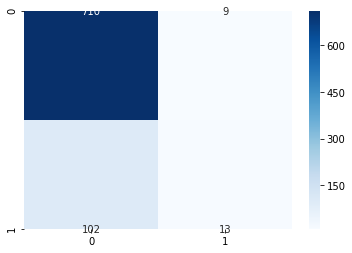

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
l_accuracy_score=accuracy_score(y_test,y_pred)
print('accuracy_score=',accuracy_score(y_test,y_pred))

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test , np.round(y_pred)+0.))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       719
           1       0.59      0.11      0.19       115

    accuracy                           0.87       834
   macro avg       0.73      0.55      0.56       834
weighted avg       0.84      0.87      0.83       834



## LOGISTIC REGRESSION

In [53]:
from sklearn.linear_model import LogisticRegression
log_regressor=LogisticRegression()
log_regressor.fit(X_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
y_log_pred = log_regressor.predict(X_test)

In [55]:
y_log_pred=np.round(y_log_pred)+0.0

accuracy_score= 0.8669064748201439


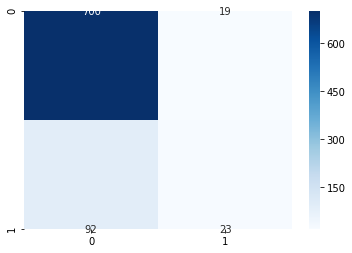

In [56]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm_log=confusion_matrix(y_test,y_log_pred)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
l_accuracy_score=accuracy_score(y_test,y_log_pred)
print('accuracy_score=',accuracy_score(y_test,y_log_pred))

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test , np.round(y_log_pred)+0.))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       719
           1       0.55      0.20      0.29       115

    accuracy                           0.87       834
   macro avg       0.72      0.59      0.61       834
weighted avg       0.84      0.87      0.84       834



## SVM

In [58]:
from sklearn.svm import SVR
svm_classifier = SVR(kernel = 'rbf',gamma="auto")
svm_classifier.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [59]:
y_svm_pred=svm_classifier.predict(X_test)

In [60]:
y_svm_pred=np.round(y_svm_pred)+0.0

accuracy_score= 0.9244604316546763


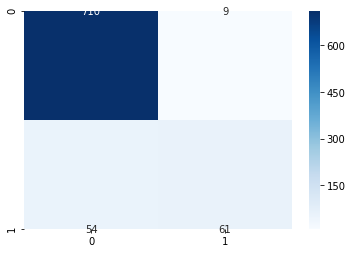

In [61]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm_svm=confusion_matrix(y_test,y_svm_pred)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
svm_accuracy_score=accuracy_score(y_test,y_svm_pred)
print('accuracy_score=',accuracy_score(y_test,y_svm_pred))

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test , np.round(y_pred)+0.))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       719
           1       0.59      0.11      0.19       115

    accuracy                           0.87       834
   macro avg       0.73      0.55      0.56       834
weighted avg       0.84      0.87      0.83       834



## KNN


In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [64]:
y_knn_pred=knn_classifier.predict(X_test)

In [65]:
y_knn_pred=np.round(y_knn_pred)+0.0

accuracy_score= 0.9064748201438849


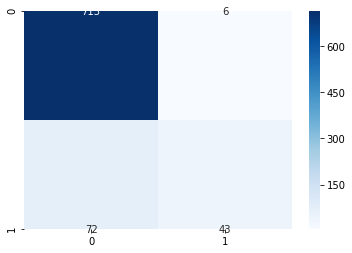

In [66]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm_knn=confusion_matrix(y_test,y_knn_pred)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
knn_accuracy_score=accuracy_score(y_test,y_knn_pred)
print('accuracy_score=',accuracy_score(y_test,y_knn_pred))

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test ,y_knn_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       719
           1       0.88      0.37      0.52       115

    accuracy                           0.91       834
   macro avg       0.89      0.68      0.74       834
weighted avg       0.90      0.91      0.89       834



## RANDOM FOREST

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [69]:
y_rf_pred=rf_classifier.predict(X_test)

In [70]:
y_rf_pred=np.round(y_rf_pred)+0.0

accuracy_score= 0.9568345323741008


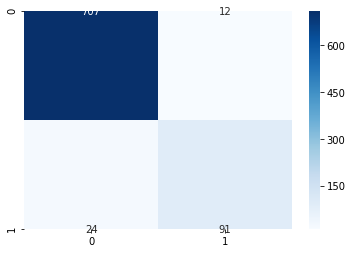

In [71]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm_rf=confusion_matrix(y_test,y_rf_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
rf_accuracy_score=accuracy_score(y_test,y_rf_pred)
print('accuracy_score=',accuracy_score(y_test,y_rf_pred))

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test ,y_rf_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       719
           1       0.88      0.79      0.83       115

    accuracy                           0.96       834
   macro avg       0.93      0.89      0.91       834
weighted avg       0.96      0.96      0.96       834



## MODEL SELECTION

After training the models the accuracy scores are stored in accuracy_score as a dictionary and the best of them is choosen as the model

In [73]:
accuracy_score={"linear_regression":l_accuracy_score,"logistic_regression":l_accuracy_score,"svm":svm_accuracy_score,"knn":knn_accuracy_score,"random_forest":rf_accuracy_score}

In [74]:
accuracy_score

{'linear_regression': 0.8669064748201439,
 'logistic_regression': 0.8669064748201439,
 'svm': 0.9244604316546763,
 'knn': 0.9064748201438849,
 'random_forest': 0.9568345323741008}

In [75]:
best_accuracy_score = max(accuracy_score, key=accuracy_score.get) 

In [76]:
best_accuracy_score

'random_forest'

from here we get the best model is the random forest model

## Get Feature Importance from the classifier


Defining model as the random forest classifer

In [77]:
model=rf_classifier

Getting how important are the given features to predict the churn 

In [78]:
print(model.feature_importances_)

[0.02893676 0.0346067  0.00622211 0.06832183 0.01742238 0.02815578
 0.13660047 0.0345908  0.13293727 0.06291694 0.0283371  0.0576753
 0.04265491 0.03180778 0.04108057 0.04305599 0.03964477 0.03997473
 0.12505781]


A graph is plotted

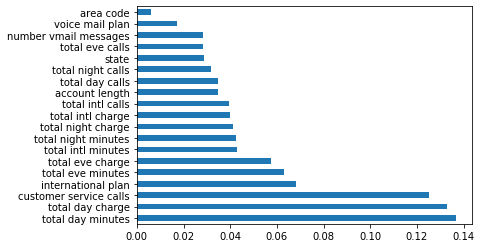

In [79]:
feat_importances = pd.Series(model.feature_importances_,index=datas.columns)
feat_importances.nlargest(19).plot(kind='barh')
plt.show()